In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.__version__

'2.0.0'

In [3]:
data = pd.read_csv('DJI.csv')

In [4]:
data.shape

(251, 7)

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-30,25307.140625,25549.710938,25250.970703,25538.460938,25538.460938,482250000
1,2018-12-03,25779.570313,25980.210938,25670.509766,25826.429688,25826.429688,388480000
2,2018-12-04,25752.560547,25773.119141,25008.109375,25027.070313,25027.070313,418900000
3,2018-12-06,24737.419922,24951.009766,24242.220703,24947.669922,24947.669922,471690000
4,2018-12-07,24918.820313,25095.619141,24284.779297,24388.949219,24388.949219,398230000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
Date         251 non-null object
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,26025.928170,26150.335004,25889.582856,26031.799746,26031.799746,2.972486e+08
std,1160.468904,1114.808052,1211.755909,1162.030564,1162.030564,1.450528e+08
min,21857.730469,22339.869141,21712.529297,21792.199219,21792.199219,1.206300e+08
25%,25566.040039,25673.125000,25372.919922,25539.015626,25539.015626,2.409900e+08
50%,26169.910156,26248.669922,26038.099609,26143.050781,26143.050781,2.775600e+08
75%,26850.939453,26958.405274,26739.099610,26818.419922,26818.419922,3.205650e+08
max,28156.470703,28174.970703,28075.230469,28164.000000,28164.000000,2.190810e+09


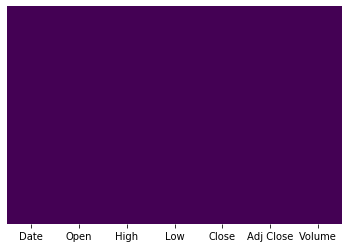

In [8]:
sb.heatmap(data.isna(),
          cbar = False,
          yticklabels = False,
          cmap = 'viridis')

In [9]:
data.drop(['Date', 'Adj Close', 'Volume'], axis = 1, inplace = True)

In [10]:
data.head()

,Open,High,Low,Close
0,25307.140625,25549.710938,25250.970703,25538.460938
1,25779.570313,25980.210938,25670.509766,25826.429688
2,25752.560547,25773.119141,25008.109375,25027.070313
3,24737.419922,24951.009766,24242.220703,24947.669922
4,24918.820313,25095.619141,24284.779297,24388.949219


# We want to predict Close value of stock 

## Using compatibility module v2(Eager Execution)

In [11]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1:].values

In [12]:
X.shape, Y.shape

((251, 3), (251, 1))

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [14]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((200, 3), (200, 1), (51, 3), (51, 1))

# Initializing the weights and bias

### Defining the weights and bias for layer 1

In [15]:
x_train.shape[1]

3

In [16]:
layer1_w = tf.compat.v2.Variable(tf.compat.v1.random_uniform([x_train.shape[1], 10]))
layer1_b = tf.compat.v2.Variable(tf.zeros([10]))

In [17]:
layer1_w, layer1_b

(<tf.Variable 'Variable:0' shape=(3, 10) dtype=float32, numpy=
 array([[0.170771  , 0.7265971 , 0.18978512, 0.5214914 , 0.85748196,
         0.3524716 , 0.67810607, 0.6308117 , 0.3883536 , 0.52581203],
        [0.92048025, 0.5095571 , 0.1609149 , 0.6754812 , 0.7987231 ,
         0.8305353 , 0.8573221 , 0.82935154, 0.5874057 , 0.6850772 ],
        [0.39135253, 0.48254132, 0.8161907 , 0.76992285, 0.8754847 ,
         0.20342112, 0.9389143 , 0.9149853 , 0.49538052, 0.40434086]],
       dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

### Defining the weights and bias for layer 2

In [18]:
layer2_w = tf.Variable(tf.compat.v1.random_uniform([10, 6]))
layer2_b = tf.Variable(tf.zeros([6]))

In [19]:
layer2_w, layer2_b

(<tf.Variable 'Variable:0' shape=(10, 6) dtype=float32, numpy=
 array([[0.86375356, 0.09977233, 0.08265376, 0.9344541 , 0.19792986,
         0.77373743],
        [0.5920721 , 0.43556523, 0.16133344, 0.15279412, 0.01155365,
         0.7215611 ],
        [0.8489839 , 0.18605411, 0.33213365, 0.24126422, 0.29055548,
         0.11177945],
        [0.9528576 , 0.02321959, 0.9369873 , 0.15540957, 0.82645774,
         0.86383486],
        [0.70084786, 0.56059456, 0.46378815, 0.14637923, 0.9589987 ,
         0.83416283],
        [0.3842249 , 0.21020722, 0.03494847, 0.75588655, 0.09461999,
         0.99709   ],
        [0.6667812 , 0.61132896, 0.7971722 , 0.23207057, 0.06381452,
         0.4825709 ],
        [0.18717039, 0.22983491, 0.10574567, 0.6098598 , 0.82402515,
         0.24498272],
        [0.31006873, 0.70996463, 0.8742291 , 0.26075804, 0.9940798 ,
         0.50952566],
        [0.9158449 , 0.01325655, 0.3288331 , 0.29299712, 0.5890436 ,
         0.9242445 ]], dtype=float32)>,
 <tf.Vari

###  Defining the weights and bias for layer 3

In [20]:
layer3_w = tf.Variable(tf.compat.v1.random_uniform([6,8]))
layer3_b = tf.Variable(tf.zeros([8]))

In [21]:
layer3_w, layer3_b

(<tf.Variable 'Variable:0' shape=(6, 8) dtype=float32, numpy=
 array([[5.5327046e-01, 7.2956383e-01, 6.5633547e-01, 4.7517455e-01,
         9.2450929e-01, 5.6705987e-01, 1.8145764e-01, 9.4041359e-01],
        [7.2164381e-01, 7.3573494e-01, 6.3024032e-01, 7.2530758e-01,
         1.2836397e-01, 5.1878536e-01, 2.7223313e-01, 6.2363744e-02],
        [7.8364277e-01, 6.3687134e-01, 4.9009216e-01, 5.3248584e-01,
         6.5645218e-02, 5.2127063e-01, 2.1427310e-01, 5.9592724e-04],
        [6.4090669e-01, 9.1402698e-01, 1.2288833e-01, 4.9617219e-01,
         4.7476685e-01, 7.0935106e-01, 1.9562352e-01, 2.8012574e-01],
        [7.8520429e-01, 7.8661168e-01, 5.3650868e-01, 7.5059700e-01,
         3.1928325e-01, 1.6718912e-01, 8.2923222e-01, 1.5197682e-01],
        [5.2897346e-01, 2.0501244e-01, 7.3945272e-01, 9.7249973e-01,
         6.0981393e-02, 3.1813622e-02, 9.5847142e-01, 9.2517376e-02]],
       dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(8,) dtype=float32, numpy=array([0., 0., 0., 0

### Defining the weights and bias for output layer 

In [22]:
layero_w = tf.Variable(tf.compat.v1.random_uniform([8, 1]))
layero_b = tf.Variable(tf.zeros([1]))

In [23]:
layero_w, layero_b

(<tf.Variable 'Variable:0' shape=(8, 1) dtype=float32, numpy=
 array([[0.5046662 ],
        [0.4559859 ],
        [0.8423059 ],
        [0.2983284 ],
        [0.90286314],
        [0.09095836],
        [0.43250537],
        [0.19154882]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

In [24]:
x = tf.constant(x_train, dtype = 'float32')

In [25]:
type(x)

tensorflow.python.framework.ops.EagerTensor

# Forward propagation 

In [26]:
#Layer1 propagation
hidden_layer1 = tf.add(tf.matmul(x, layer1_w), layer1_b)
hidden_layer1 = tf.nn.relu(hidden_layer1)


#Layer2 propagation
hidden_layer2 = tf.add(tf.matmul(hidden_layer1, layer2_w), layer2_b)
hidden_layer2 = tf.nn.relu(hidden_layer2)


#Layer3 propagation
hidden_layer3 = tf.add(tf.matmul(hidden_layer2, layer3_w), layer3_b)
hidden_layer3 = tf.nn.relu(hidden_layer3)


#Output Layer propagation
out = tf.add(tf.matmul(hidden_layer3, layero_w), layero_b)

# Back Propagation

In [27]:
cost_function = tf.reduce_mean(tf.square(out - y_train))

In [28]:
cost_function

<tf.Tensor: id=121, shape=(), dtype=float32, numpy=6805097300000.0>

## Using Compatibility module v1

In [29]:
tf.compat.v1.disable_eager_execution()

# Place Holders

In [30]:
x = tf.compat.v1.placeholder(dtype = tf.float32, shape = [None, x_train.shape[1]])
y = tf.compat.v1.placeholder(dtype = tf.float32, shape = [None, 1])

# Initializing the weights and bias

In [38]:
w1 = tf.compat.v1.Variable(tf.compat.v1.random_uniform([x_train.shape[1], 10]))
b1 = tf.compat.v1.Variable(tf.zeros([10]))


w2 = tf.Variable(tf.compat.v1.random_uniform([10, 10]))
b2 = tf.Variable(tf.zeros([10]))



# w3 = tf.Variable(tf.compat.v1.random_uniform([6, 8]))
# b3 = tf.Variable(tf.zeros([8]))


wo = tf.Variable(tf.compat.v1.random_uniform([10, 1]))
bo = tf.Variable(tf.zeros([1]))



init = tf.compat.v1.global_variables_initializer()

In [39]:
 w1, b1

(<tf.Variable 'Variable_6:0' shape=(3, 10) dtype=float32>,
 <tf.Variable 'Variable_7:0' shape=(10,) dtype=float32>)

In [40]:
w2, b2

(<tf.Variable 'Variable_8:0' shape=(10, 10) dtype=float32>,
 <tf.Variable 'Variable_9:0' shape=(10,) dtype=float32>)

In [41]:
#w3, b3

In [42]:
wo, bo

(<tf.Variable 'Variable_10:0' shape=(10, 1) dtype=float32>,
 <tf.Variable 'Variable_11:0' shape=(1,) dtype=float32>)

# Forward propagation

In [43]:
#Layer1 propagation
hidden1 = tf.add(tf.matmul(x, w1), b1)
hidden1 = tf.nn.relu(hidden1)


#Layer2 propagation
hidden2 = tf.add(tf.matmul(hidden1, w2), b2)
hidden2 = tf.nn.relu(hidden2)


#Layer3 propagation
# hidden3 = tf.add(tf.matmul(hidden2, w3), b3)
# hidden3 = tf.nn.relu(hidden3)


#Output Layer propagation
out = tf.add(tf.matmul(hidden2, wo), bo)

In [45]:
hidden1, hidden2, out

(<tf.Tensor 'Relu_4:0' shape=(None, 10) dtype=float32>,
 <tf.Tensor 'Relu_5:0' shape=(None, 10) dtype=float32>,
 <tf.Tensor 'Add_6:0' shape=(None, 1) dtype=float32>)

# Back Propagation

In [46]:
cost_function = tf.reduce_mean(tf.square(out - y))

In [47]:
cost_function

<tf.Tensor 'Mean:0' shape=() dtype=float32>

# Optimizer

In [48]:
learning_rate = 0.001
opt = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [49]:
opt

<tf.Operation 'GradientDescent' type=NoOp>

# launching the graph in Session

In [50]:
sess = tf.compat.v1.Session()
sess.run(init)

In [51]:
epoch = 100
for i in range(epoch):
    sess.run(opt, feed_dict = {x:x_train, y:y_train})

In [52]:
sess

In [53]:
y_pred = sess.run(out, feed_dict = {x:x_test})

In [54]:
type(y_pred)

numpy.ndarray

In [59]:
y_pred[0:5]

array([[3529.2915],
       [3529.2915],
       [3529.2915],
       [3529.2915],
       [3529.2915]], dtype=float32)

In [60]:
y_test[0:5]

array([[27359.160156],
       [25169.880859],
       [26452.660156],
       [27171.900391],
       [26783.490234]])

In [56]:
from sklearn import metrics

In [61]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [62]:
rmse

22688.593739033393

In [1]:
# tf.compat.v1.disable_eager_execution()
# x = tf.compat.v1.placeholder(dtype = tf.float64, shape = [None, x_train.shape[1]])
# y = tf.compat.v1.placeholder(dtype = tf.float64, shape = [None, 1])